In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 30,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01])

In [5]:
output = np.load("output.npy")
output

array([-0.60306442, -0.70077664, -0.78205132, -0.84620517, -0.89326143,
       -0.92382586, -0.93904954, -0.94045317, -0.92962795, -0.90795422,
       -0.8764298 , -0.835603  , -0.78557295, -0.72602242, -0.65627342,
       -0.57537943, -0.482292  , -0.37616497, -0.25686926, -0.12573707,
        0.01364657,  0.15513034,  0.29082888,  0.41311783,  0.51668996,
        0.59940439,  0.66176069,  0.70576459,  0.73391479,  0.74858099,
        0.75172162,  0.74480528,  0.72882617,  0.70434958,  0.67155927,
        0.63030022,  0.5801155 ,  0.52029175,  0.44993258,  0.36808991,
        0.27399588,  0.16742785,  0.04920165, -0.07832778, -0.21103658,
       -0.3434065 , -0.46957177, -0.58457035, -0.68507075, -0.76928633,
       -0.83647203, -0.88654512, -0.91999412, -0.93787032, -0.94164139,
       -0.93290448, -0.91309279, -0.8832801 , -0.84409761, -0.79572409,
       -0.73791397, -0.67004812, -0.59121704, -0.50036979, -0.39658767,
       -0.27955657, -0.15027599, -0.01187316,  0.12994076,  0.26

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.14299214e-01],
       [  2.00000000e+01,   4.06051934e-01],
       [  3.00000000e+01,   2.98576325e-01],
       [  4.00000000e+01,   2.31547311e-01],
       [  5.00000000e+01,   1.63580269e-01],
       [  6.00000000e+01,   1.20625131e-01],
       [  7.00000000e+01,   8.64456370e-02],
       [  8.00000000e+01,   6.48404285e-02],
       [  9.00000000e+01,   5.51027879e-02],
       [  1.00000000e+02,   3.80532108e-02],
       [  1.10000000e+02,   3.15546654e-02],
       [  1.20000000e+02,   2.28688810e-02],
       [  1.30000000e+02,   1.74451396e-02],
       [  1.40000000e+02,   1.58100855e-02],
       [  1.50000000e+02,   1.18094012e-02],
       [  1.60000000e+02,   8.99142399e-03],
       [  1.70000000e+02,   7.77208107e-03],
       [  1.80000000e+02,   7.64124142e-03],
       [  1.90000000e+02,   5.90149360e-03],
       [  2.00000000e+02,   5.60020562e-03],
       [  2.10000000e+02,   6.77929400e-03],
       [  2.20000000e+02,   5.05460612e-03],
       [  

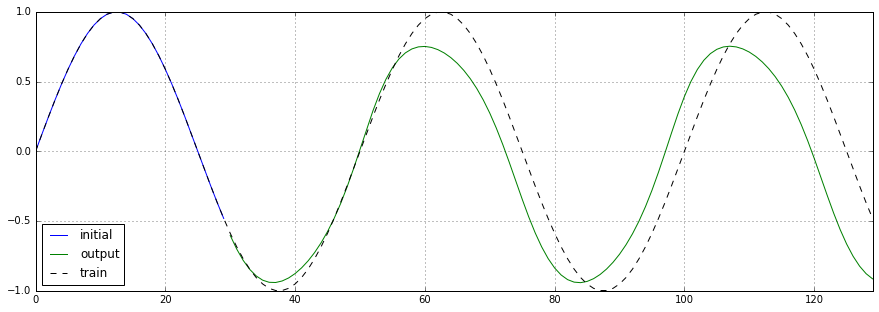

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

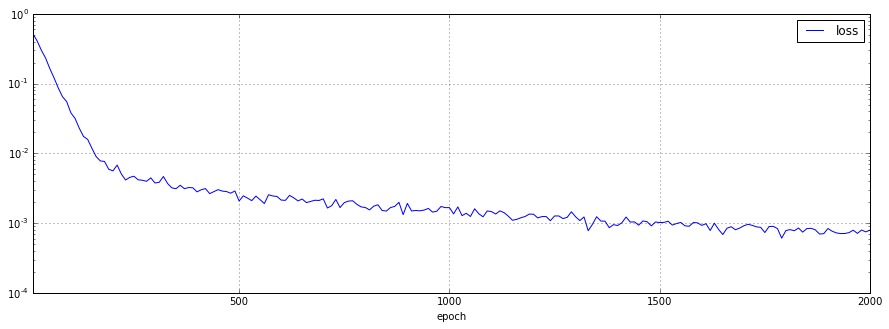

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")